In [244]:
library(tidyverse)
library(cowplot)

x <- read_csv("../data/sp_num_a_sig_0.0.csv", col_names = c("-0.65","0.0","0.65") , col_types = cols()) %>%
    mutate(sigma = "0.0", T = seq(-1,1,length.out = 25)) %>%
    pivot_longer(c(-sigma,-T))
y <- read_csv("../data/sp_num_a_sig_0.5.csv", col_names = c("-0.65","0.0","0.65") , col_types = cols()) %>%
    mutate(sigma = "0.5", T = seq(-1,1,length.out = 25)) %>%
    pivot_longer(c(-sigma,-T))
z <- read_csv("../data/sp_num_a_sig_1.0.csv", col_names = c("-0.65","0.0","0.65") , col_types = cols()) %>%
    mutate(sigma = "1.0", T = seq(-1,1,length.out = 25)) %>%
    pivot_longer(c(-sigma,-T))

cols <- c("0.0" =  "red", "0.5" = "#56B4E9", "1.0" = "#009E73")
annotations <- data.frame(mean = c("-0.65","0.0","0.65"), lab = c("mu[E] == -0.65","mu[E] == 0.0","mu[E] == 0.65"))


DT_to_T <- function(T, Tref){
    return( (1 / (((8.617e-5) * T) + (1/Tref))) - 273.15)
}


p1 <- bind_rows(x,y,z) %>%
    rename(mean = name) %>%
    mutate(T = DT_to_T(T, 288)) %>%
    ggplot() +
        geom_line(aes(x = T, y = value, group = sigma, color = sigma)) + 
        geom_text(data = annotations, aes(label = lab),x = 15, y = 20, size = 9, parse = T)+
        facet_wrap(~ mean)+
        scale_color_manual(values = cols, name = expression(sigma[E]))+
        xlab(expression(Temperature  *degree*C)) + ylab("Species Richness, N")+
        ylim(0,90)+
        theme_bw()+
        theme(strip.background = element_blank(),
              strip.text = element_blank(),
             legend.position = c(0.9,0.75),
              legend.text = element_text(size = 20),
              legend.title = element_text(size = 20), 
             axis.text = element_text(size = 12),
             axis.title = element_text(size = 20))

In [245]:
p2 <- read_csv("../data/sp_num_k.csv", col_types = cols(), col_names = c("0.0","0.5","1.0")) %>%
    mutate(T = seq(-1,1,length.out = 25)) %>%
    pivot_longer(-T) %>%
    mutate(T = DT_to_T(T, 288)) %>%
    rename(sigma = name) %>%
    ggplot(aes(x = T, y = value, color = sigma, group = sigma))+
        geom_line()+
        scale_color_manual(values = cols, name = expression(sigma[E]))+
        xlab(expression(Temperature  *degree*C)) + ylab("")+
        ylim(0,90)+
        theme_bw()+
            theme(strip.background = element_blank(),
              strip.text = element_blank(),
             legend.position = "none",
              legend.text = element_text(size = 20),
              legend.title = element_text(size = 20), 
             axis.text = element_text(size = 12),
             axis.title = element_text(size = 20))

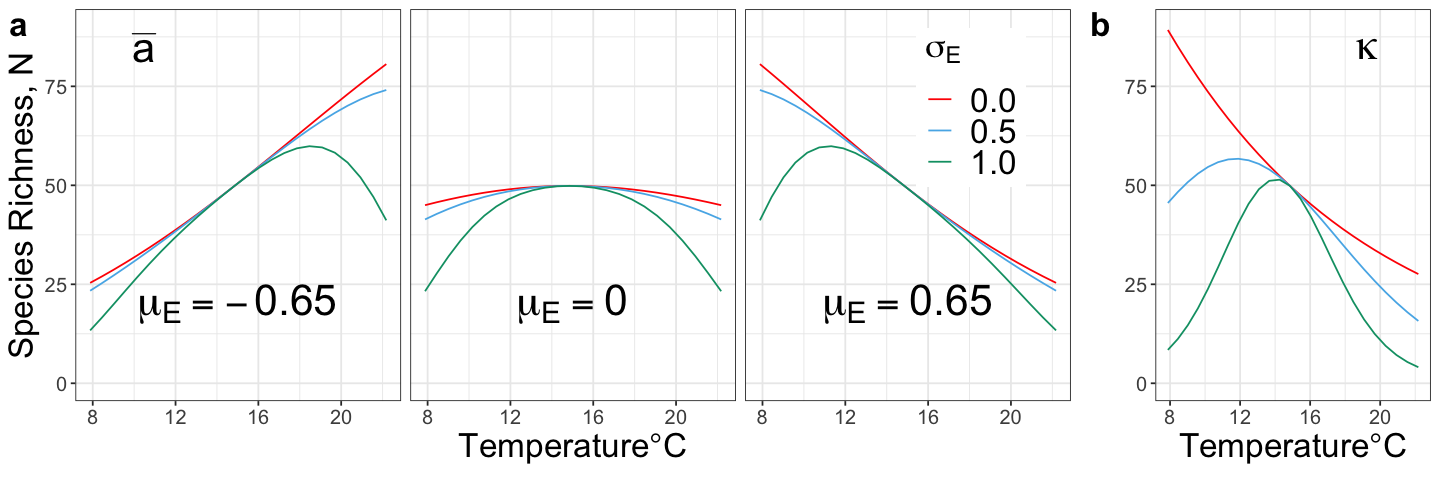

In [259]:
options(repr.plot.width = 12, repr.plot.height = 4)

p_final <- plot_grid(p1,p2, nrow = 1, rel_widths = c(0.75,0.25),labels = "auto", axis = "b" ,align = "h",label_size = 20)+
draw_label(expression(bar(a)), 0.1,0.9, size = 25)+
draw_label(expression(kappa),  0.95,0.9, size = 25)

p_final

In [260]:
ggsave("../docs/Figures/Fig_1.pdf", p_final, width = 12, height = 4)

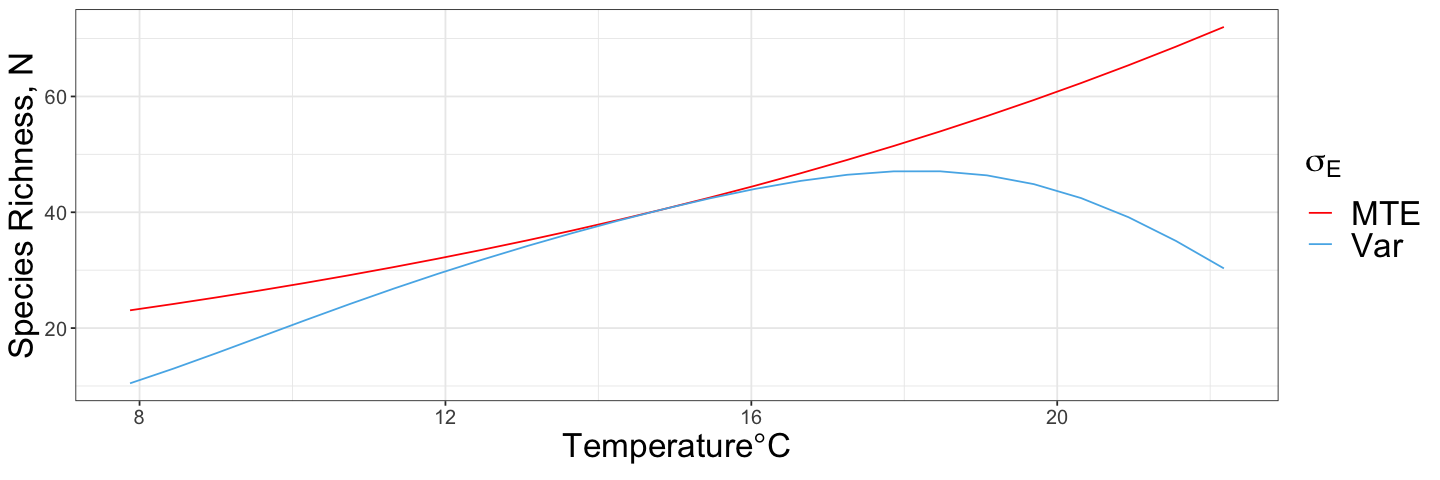